<h1 style="text-align:center"> Convnet Handwritten Digit image recognition</p1>


In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, Dense , MaxPooling2D , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import os
os.chdir(os.path.expanduser("~/Desktop"))



def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

	trainY = to_categorical(trainY)
	testY = to_categorical(testY)

	return trainX, trainY, testX, testY


def dataPreprocess(train, test):

	normalized_train = train / 255.0
	normalized_test = test / 255.0
	
	return normalized_train , normalized_test


def build_model():

	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(10, activation='linear'))

	model.compile(Adam(learning_rate=0.01) , loss= CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
	
	return model


def train_model(trainX, trainY,testX, testY ):
	model = build_model()
	model.fit(trainX, trainY, epochs=7, batch_size=50, verbose=0)
	_, accuracy = model.evaluate(testX, testY, verbose=0)

	print(f"Accuracy :  {accuracy*100.0:.2f}")
	return model




def createModel():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = dataPreprocess(trainX, testX)
	model= train_model(trainX, trainY,testX, testY)
	model.save('cnn_digit_detection')
	print("Model Saved")
	return model

model = createModel()

Accuracy :  97.93
INFO:tensorflow:Assets written to: cnn_digit_detection/assets


INFO:tensorflow:Assets written to: cnn_digit_detection/assets


Model Saved


0


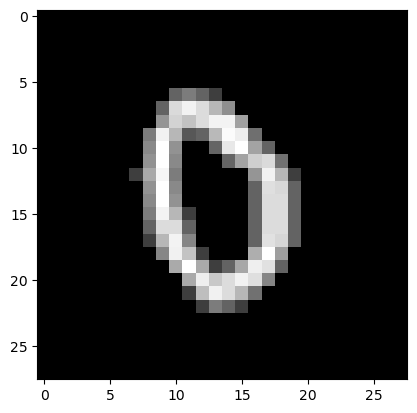

In [11]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

os.chdir(os.path.expanduser("~/Desktop"))
loaded_model = tf.keras.models.load_model('cnn_digit_detection')
img = cv.imread('img.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# model testing.
predicion = loaded_model.predict(np.array([img]),verbose=0)
print(np.argmax(predicion))


plt.imshow(img, cmap='gray')
plt.show()

